# **<center><font style="color:rgb(100,109,254)">Contour Detection 101 Part 1: The Basics </font> </center>**

Contour detection is a popular computer vision technique used for analyzing objects in an image. Contours are a useful tool for shape analysis, object detection and recognition.

<center>
<img src="https://drive.google.com/uc?export=download&id=1yAoM5mODlkGIlfYn-dvCnpBPKycDsseJ" width=600>
</center>

<br>
A contour can be simply defined as a curve that joins a set of points enclosing an area having the same color or intensity. This area of uniform color or intensity forms the object that we are trying to detect, and the curve enclosing this area is the contour representing the shape of the object. So essentially, contour detection works similarly to edge-detection but with the restriction that the edges detected must form a closed path.

In OpenCV contour detection can be performed with the help of function **`cv2.findContours()`** which we will discuss below along with the other important steps you need to perform to effectively detect the contours.

### **<font style="color:rgb(134,19,348)"> Import the Libraries</font>**

Let's start by importing the required libraries.

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

#### **Read the Image**
The image read below consists of a bunch of shapes for which we will find the contours.

In [ ]:
# Read the image
Gray_image = cv2.imread('media/image.png', 0)


# Display the image
plt.figure(figsize=[10,10])
plt.imshow(image1, cmap='gray');plt.title("Original Image");plt.axis("off");

## **<font style="color:rgb(134,19,348)"> Detecting contours in an image </font>**
OpenCV saves us the trouble of having to write lengthy algorithms for contour detection and provides a handy function **`findContours()`** that analysis the [topological structure of the binary image by border following](https://www.sciencedirect.com/science/article/abs/pii/0734189X85900167), a contour detection technique developed in 1985.

The **`findContours()`** functions takes a binary image as input. The foreground is assumed to be white, and the background is assumed to be black. If that is not the case, then you can invert the image using the [**```cv2.bitwise_not()```**](https://docs.opencv.org/3.4/d2/de8/group__core__array.html#ga0002cf8b418479f4cb49a75442baee2f) function.

#### **Function Syntax:**


> [**```contours, hierarchy =   cv2.findContours(image, mode, method, contours, hierarchy, offset)```**](https://docs.opencv.org/3.4/d3/dc0/group__imgproc__shape.html#ga17ed9f5d79ae97bd4c7cf18403e1689a)

**Parameters:**

* **```image```** - It is the input image (8-bit single-channel). Non-zero pixels are treated as 1's. Zero pixels remain 0's, so the image is treated as binary. You can use compare, inRange, threshold, adaptiveThreshold, Canny, and others to create a binary image out of a grayscale or color one.

* **```mode```** - It is the contour retrieval mode, ( RETR_EXTERNAL, RETR_LIST, RETR_CCOMP, RETR_TREE )

* **```method```** - It is the contour approximation method. ( CHAIN_APPROX_NONE, CHAIN_APPROX_SIMPLE, CHAIN_APPROX_TC89_L1, etc )

* **```offset```** - It is the optional offset by which every contour point is shifted. This is useful if the contours are extracted from the image ROI, and then they should be analyzed in the whole image context.

**Returns:**

* **```contours```** - It is the detected contours. Each contour is stored as a vector of points.

* **```hierarchy```** - It is the optional output vector containing information about the image topology. It has been described in detail in the video above.

<br>

We will go through all the important parameters in detail. For now, let's detect some contours in the image that we read above.

Since the image contains only contains a single-channel instead of three. And even that channel is in binary state  (black & White) so it can be directly passed to the **`findContours()`** function.

In [ ]:
# Find all contours in the image.
contours, hierarchy = cv2.findContours(Gray_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Display the total number of contours found.
print("Number of contours found = {}".format(len(contours)))

Number of contours found = 5


## **<font style="color:rgb(134,19,348)">Visualizing the contours detected</font>**
As you can see the **`cv2.findContours()`** function was able to correctly detect the 5 external shapes in the image. But to visualize these results we can use the **`cv2.drawContours()`** function which simply draws the contours onto an image.

#### **Function Syntax:**


> [**```cv2.drawContours(image, contours, contourIdx, color, thickness, lineType, hierarchy, maxLevel, offset)```**](https://docs.opencv.org/3.4/d6/d6e/group__imgproc__draw.html#ga746c0625f1781f1ffc9056259103edbc)

**Parameters:**

* **```image```** - It is the image on which contours are to be drawn.
* **```contours```** -  It is point vector(s) representing the contour(s). It is usually an array of contours.
* **```contourIdx```** - It is the parameter, indicating a contour to draw. If it is negative, all the contours are drawn.
* **```color```** - It is the color of the contours.
* **```thickness```** - It is the thickness of lines the contours are drawn with. If it is negative (for example, thickness=FILLED ), the contour interiors are drawn.
* **```lineType```** -  It is the type of line. You can find the possible options [here](https://docs.opencv.org/3.4/d0/de1/group__core.html#gaf076ef45de481ac96e0ab3dc2c29a777).
* **```hierarchy```** - It is the optional information about hierarchy. It is only needed if you want to draw only some of the contours (see maxLevel ).
* **```maxLevel```** -  It is the maximal level for drawn contours. If it is 0, only the specified contour is drawn. If it is 1, the function draws the contour(s) and all the nested contours. If it is 2, the function draws the contours, all the nested contours, all the nested-to-nested contours, and so on. This parameter is only taken into account when there is a hierarchy available.
* **```offset```** - It is the optional contour shift parameter. Shift all the drawn contours by the specified offset=(dx, dy).

To prevent the original image from being overwritten, we use **`np.copy()`** for drawing the contours on a copy of the image.

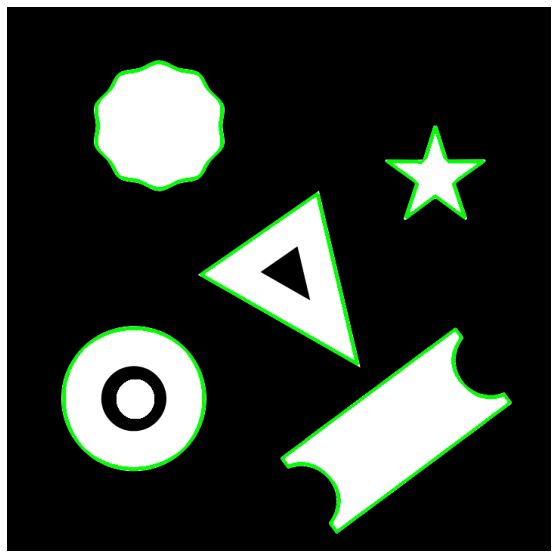

In [ ]:
# Read the image in color mode for drawing purposes.
image1 = cv2.imread('media/image.png')


# Draw all the contours.
cv2.drawContours(image1, contours, -1, (0,255,0), 3)

# Display the result
plt.figure(figsize=[10,10])
plt.imshow(image1[:,:,::-1]);plt.axis("off");

## **<font style="color:rgb(134,19,348)">Pre-processing images For Contour Detection</font>**

As you have seen above that the **`cv2.findContours()`** functions take in as input a single channel binary image, however, in most cases the original image will not be a binary image. Detecting contours in colored images require pre-processing to produce a single-channel binary image that can be then used for contour detection.

The two most commonly used techniques for this pre-processing are:

* **Thresholding based Pre-processing**
* **Edge Based Pre-processing**

Below we will see how you can accurately detect contours using these techniques.

### **<font style="color:rgb(134,19,348)">Thresholding based Pre-processing For Contours</font>**

So to detect contours in colored images we can perform fixed level image thresholding to produce a **binary image** that can be then used for contour detection.
<br>
<br>
<center>
<img src="https://drive.google.com/uc?export=download&id=16q8JI_tS0RUR0VQHW2bfvhSGh0hHAMbc">
</center>
<br>

All images are read using [**`cv2.imread()`**](https://docs.opencv.org/master/d4/da8/group__imgcodecs.html#ga288b8b3da0892bd651fce07b3bbd3a56) function which reads the image in **BGR** format but since [**`plt.imshow()`**](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.imshow.html) displays the image in **RGB** format we reverse the channels using [**NumPy**](https://numpy.org/doc/stable/reference/arrays.indexing.html).

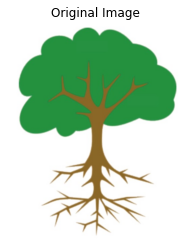

In [ ]:
# Read the image
image2 = cv2.imread('media/tree.jpg')

# Display the image
plt.imshow(image2[:,:,::-1]);plt.title("Original Image");plt.axis("off");

Lets have a look at how the results will look like if contour detection is performed without using thresholding.

We also need to convert the 3-channel BGR image to single-channel image using the [**`cv2.cvtColor()`**](https://docs.opencv.org/master/d8/d01/group__imgproc__color__conversions.html#ga397ae87e1288a81d2363b61574eb8cab) function.

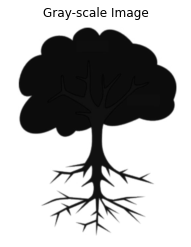

In [ ]:
# Make a copy of the source image.
image2_copy = image2.copy()

# Convert the image to gray-scale
gray = cv2.cvtColor(image2_copy, cv2.COLOR_BGR2GRAY)

# Display the result
plt.imshow(gray, cmap="gray");plt.title("Gray-scale Image");plt.axis("off");

Contour detection on the image above will only result in a contour outlining the edges of the image. This is because the **`cv2.findContours()`** function expects the foreground to be white, and the background to be black, which is not the case above so we need to invert the colors using **```cv2.bitwise_not()```**.

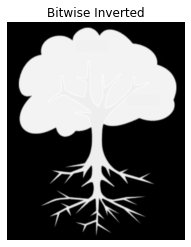

In [ ]:
# Invert the colours
gray_inverted = cv2.bitwise_not(gray)

# Display the result
plt.imshow(gray_inverted ,cmap="gray");plt.title("Bitwise Inverted");plt.axis("off");

The inverted image with black background and white foreground can now be used for contour detection.

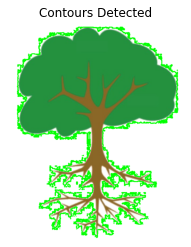

In [ ]:
# find the contours from the inverted gray-scale image
contours, hierarchy = cv2.findContours(gray_inverted, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)

# draw all contours
cv2.drawContours(image2_copy, contours, -1, (0, 255, 0), 2)

# Display the result
plt.imshow(image2_copy[:,:,::-1]);plt.title("Contours Detected");plt.axis("off");

As you can see the contours detected poorly align with the boundary of the tree in the image. This is because we only fulfilled the requirement of a single channel image but we did not make sure that the image was binary in colors, resulting in noise along the edges. This is why we need thresholding to provide us a binary image.

#### **Thresholding the image**

We will use the function [**`cv2.threshold()`**](https://docs.opencv.org/master/d7/d1b/group__imgproc__misc.html#gae8a4a146d1ca78c626a53577199e9c57) to perform thresholding. The function takes in as input the gray-scale image, applies fixed level thresholding, and returns a binary image. In this case, all the pixel values below 100 are set to 0(black) while the ones above are set to 255(white). Since the image has already been inverted **`cv2.THRESH_BINARY`** is used, but if the image is not inverted **`cv2.THRESH_BINARY_INV`** should be used.

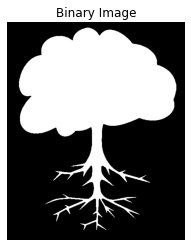

In [ ]:
# create a binary thresholded image
_, binary = cv2.threshold(gray_inverted, 100, 255, cv2.THRESH_BINARY)

# Display the result
plt.imshow(binary, cmap="gray");plt.title("Binary Image");plt.axis("off");

The resultant image above is ideally what the **`cv2.findContours()`** funtion is expecting. A **single-channel** **binary image** with **Black background** and **white foreground**.

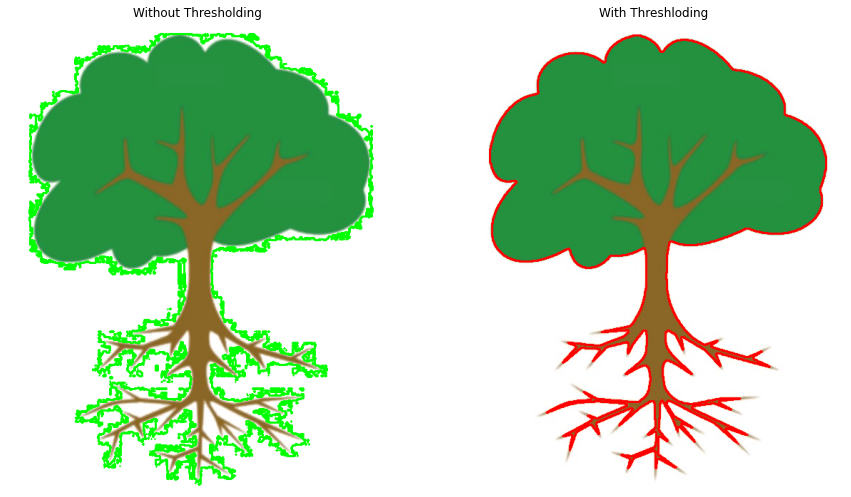

In [ ]:
# Make a copy of the source image.
image2_copy2 = image2.copy()

# find the contours from the thresholded image
contours, hierarchy = cv2.findContours(binary, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)

# draw all the contours found
image2_copy2 = cv2.drawContours(image2_copy2, contours, -1, (0, 0, 255), 2)

# Plot both of the resuts for comparison
plt.figure(figsize=[15,15])
plt.subplot(121);plt.imshow(image2_copy[:,:,::-1]);plt.title("Without Thresholding");plt.axis('off')
plt.subplot(122);plt.imshow(image2_copy2[:,:,::-1]);plt.title("With Threshloding");plt.axis('off');

As you can see the results achieved after thresholding are accurate.

### **<font style="color:rgb(134,19,348)">Edge Based Pre-processing For Contours</font>**
Thresholding works out well for simple images with fewer variations in colors, however, for complex images, it's not always easy to do background-foreground segmentation using thresholding. In these cases creating the binary image using edge detection yields better results.
<br>
<br>
<center>
<img src="https://drive.google.com/uc?export=download&id=13V6h38cm0oEwSbG6biVtqWghLj66GhIO">
</center>

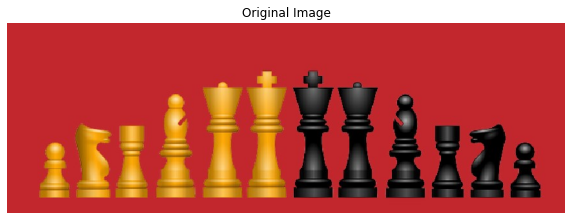

In [ ]:
# Read the image
image3 = cv2.imread('media/chess.jpg')

# Display the image
plt.figure(figsize=[10,10])
plt.imshow(image3[:,:,::-1]);plt.title("Original Image");plt.axis("off");

 We will use function [**`cv2.Canny()`**](https://docs.opencv.org/4.2.0/dd/d1a/group__imgproc__feature.html#ga04723e007ed888ddf11d9ba04e2232de) for detecting the edges in the image. **`cv2.Canny()`** returns a single channel binary image which is all we need to perform contour detection in the next step. We also make use of the [**`cv2.GaussianBlur()`**](https://docs.opencv.org/master/d4/d86/group__imgproc__filter.html#gaabe8c836e97159a9193fb0b11ac52cf1) function to remove noise from the image.

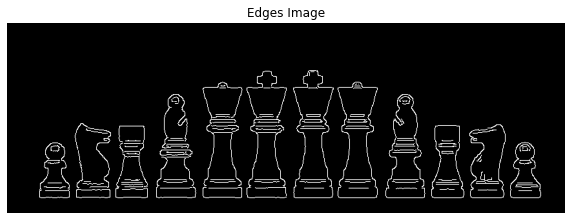

In [ ]:
# Blur the image to remove noise
blurred_image = cv2.GaussianBlur(image3.copy(),(5,5),0)

# Apply canny edge detection
edges = cv2.Canny(blurred_image, 100, 160)

# Display the resultant binary image of edges
plt.figure(figsize=[10,10])
plt.imshow(edges,cmap='Greys_r');plt.title("Edges Image");plt.axis("off");

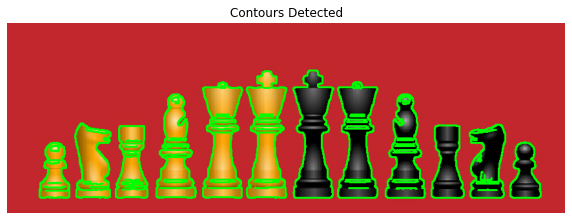

In [ ]:
# Detect the contour using the using the edges
contours, hierarchy = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Draw the contours
image3_copy = image3.copy()
cv2.drawContours(image3_copy, contours, -1, (0, 255, 0), 2)

# Display the drawn contours
plt.figure(figsize=[10,10])
plt.imshow(image3_copy[:,:,::-1]);plt.title("Contours Detected");plt.axis("off");

In comparison, if we were to use thresholding as before it would yield poor result that will only manage to correctly outline half of the chess pieces in the image at a time. So for a fair comparison, we will use [**`cv2.adaptiveThreshold()`**](https://docs.opencv.org/3.4/d7/d1b/group__imgproc__misc.html#ga72b913f352e4a1b1b397736707afcde3) to perform adaptive thresholding which adjusts to different color intensities in the image.

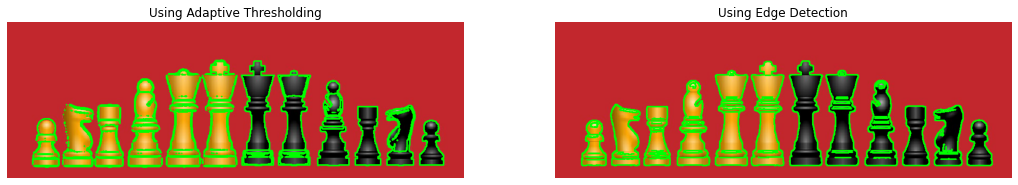

In [ ]:
image3_copy2 = image3.copy()

# Remove noise from the image
blurred = cv2.GaussianBlur(image3_copy2,(3,3),0)

# Convert the image to gray-scale
gray = cv2.cvtColor(blurred, cv2.COLOR_BGR2GRAY)

# Perform adaptive thresholding
binary = cv2.adaptiveThreshold(gray,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY_INV, 11, 5)

# Detect and Draw contours
contours, hierarchy = cv2.findContours(binary, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cv2.drawContours(image3_copy2, contours, -1, (0, 255, 0), 2)

# Plotting both results for comparison
plt.figure(figsize=[18,18])
plt.subplot(121);plt.imshow(image3_copy2[:,:,::-1]);plt.title("Using Adaptive Thresholding");plt.axis('off')
plt.subplot(122);plt.imshow(image3_copy[:,:,::-1]);plt.title("Using Edge Detection");plt.axis('off');

As can be seen above, using canny edge detection results in finer contour detection.

## **<font style="color:rgb(134,19,348)">Drawing a selected Contour</font>**

The **`contours`** returned by the **`cv2.findContours()`** is a python **`list`** where the **ith** element is the contour for a certain shape in the image. Therefore if we are interested in just drawing one of the contours we can index it from the **`contours`** list and the selected contour only.

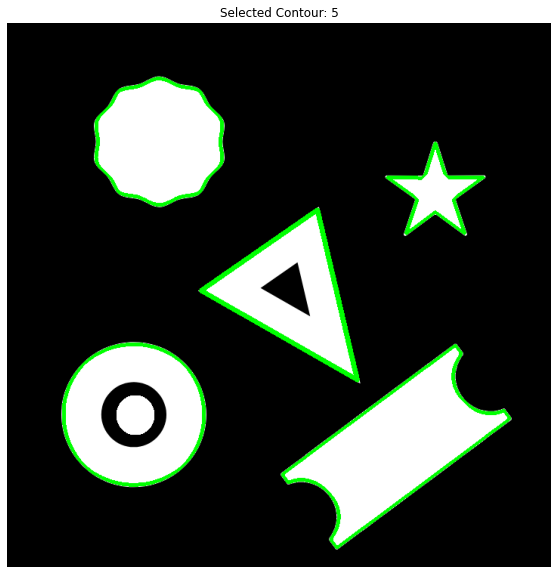

In [ ]:
image1_copy = image1.copy()

# Find all contours in the image.
contours, hierarchy = cv2.findContours(Gray_image, cv2.RETR_LIST, cv2.CHAIN_APPROX_NONE)

# Select a contour
index = 5
contour_selected = contours[index]

# Draw the selected contour
cv2.drawContours(image1_copy, contour_selected, -1, (0,255,0), 6);

# Display the result
plt.figure(figsize=[10,10])
plt.imshow(image1_copy[:,:,::-1]);plt.axis("off");plt.title('Selected Contour: ' + str(index));

Now we modify our code using a for loop to draw all of the contours separately.

In [ ]:
image1_copy = image1.copy()

# Create a figure object for displaying the images
plt.figure(figsize=[20,10])

# Convert to grayscale.
imageGray = cv2.cvtColor(image1_copy,cv2.COLOR_BGR2GRAY)

# Find all contours in the image
contours, hierarchy = cv2.findContours(imageGray, cv2.RETR_LIST, cv2.CHAIN_APPROX_NONE)

# Loop over the contours
for i,cont in enumerate(contours):

        # Draw the ith contour
        image1_copy = cv2.drawContours(image1.copy(), cont, -1, (0,255,0), 3)

        # Add a subplot to the figure
        plt.subplot(2, 4, i+1)

        # Turn off the axis
        plt.axis("off");plt.title('contour ' +str(i))

        # Display the image in the subplot
        plt.imshow(image1_copy)

## **<font style="color:rgb(134,19,348)">Retrieval Modes</font>**
Function **`cv2.findContours()`** does not only returns the contours found in an image but also returns valuable information about the hierarchy of the contours in the image. The hierarchy encodes how the contours may be arranged in the image, e.g, they may be nested within another contour. Often we are more interested in some contours than others. For example, you may only want to retrieve the external contour of an object.

Using the Retrieval Modes specified, the **`cv2.findContours()`** function can determine how the contours are to be returned or arranged in a hierarchy.  For more information on Retrieval modes and contour hierarchy [Read here](https://docs.opencv.org/4.1.0/d9/d8b/tutorial_py_contours_hierarchy.html).

Some of the important retrieval modes are:

- **`cv2.RETR_EXTERNAL`** - retrieves only the extreme outer contours.
- **`cv2.RETR_LIST`** - retrieves all of the contours without establishing any hierarchical relationships.
- **`cv2.RETR_TREE`** - retrieves all of the contours and reconstructs a full hierarchy of nested contours.
- **`cv2.RETR_CCOMP`** - retrieves all of the contours and organizes them into a two-level hierarchy. At the top level, there are external boundaries of the components. At the second level, there are boundaries of the holes. If there is another contour inside a hole of a connected component, it is still put at the top level.

Below we will have a look at how each of these modes return the contours.


### **<font style="color:rgb(134,19,348)">cv2.RETR_LIST</font>**
**`cv2.RETR_LIST`** simply retrieves all of the contours without establishing any hierarchical relationships between them. All of the contours can be said to have no parent or child relationship with another contour.

Number of Contours Returned: 8


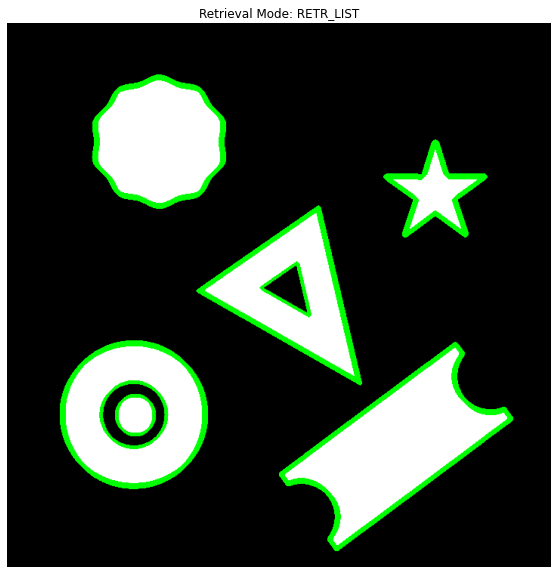

In [ ]:
image1_copy = image1.copy()

# Convert to gray-scale
imageGray = cv2.cvtColor(image1_copy, cv2.COLOR_BGR2GRAY)

# Find and return all contours in the image using the RETR_LIST mode
contours, hierarchy = cv2.findContours(imageGray, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)

# Draw all contours.
cv2.drawContours(image1_copy, contours, -1, (0,255,0), 3);

# Print the number of Contours returned
print("Number of Contours Returned: {}".format(len(contours)))

# Display the results.
plt.figure(figsize=[10,10])
plt.imshow(image1_copy);plt.axis("off");plt.title('Retrieval Mode: RETR_LIST');

###  **<font style="color:rgb(134,19,348)">cv2.RETR_EXTERNAL</font>**
**`cv2.RETR_EXTERNAL`** retrieves only the extreme outer contours i.e the contours not having any parent contour.

Number of Contours Returned: 5


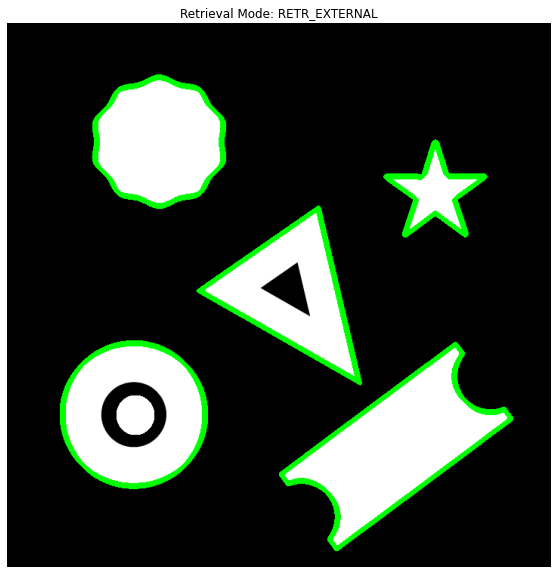

In [ ]:
image1_copy = image1.copy()

# Find all contours in the image.
contours, hierarchy = cv2.findContours(imageGray, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Draw all the contours.
cv2.drawContours(image1_copy, contours, -1, (0,255,0), 3);

# Print the number of Contours returned
print("Number of Contours Returned: {}".format(len(contours)))

# Display the results.
plt.figure(figsize=[10,10])
plt.imshow(image1_copy);plt.axis("off");plt.title('Retrieval Mode: RETR_EXTERNAL');

### **<font style="color:rgb(134,19,348)">cv2.RETR_TREE</font>**
**`cv2.RETR_TREE`** retrieves all of the contours and constructs a full hierarchy of nested contours.

Number of Contours Returned: 8


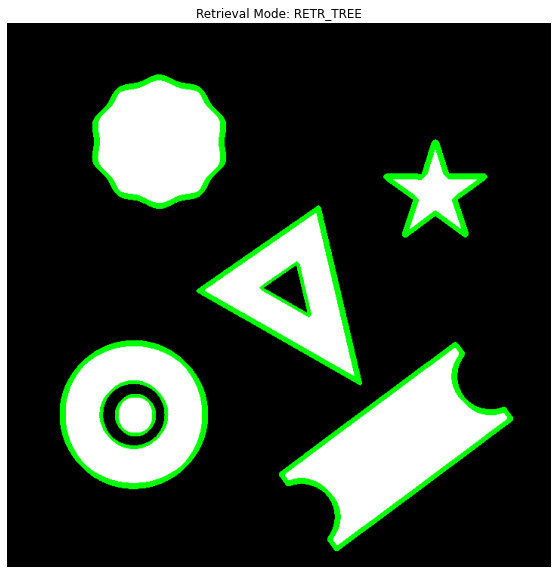

In [ ]:
src_copy = image1.copy()

# Convert to gray-scale
imageGray = cv2.cvtColor(src_copy,cv2.COLOR_BGR2GRAY)

# Find all contours in the image while maintaining a hierarchy
contours, hierarchy = cv2.findContours(imageGray, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

# Draw all the contours.
contour_image = cv2.drawContours(src_copy, contours, -1, (0,255,0), 3);

# Print the number of Contours returned
print("Number of Contours Returned: {}".format(len(contours)))

# Display the results.
plt.figure(figsize=[10,10])
plt.imshow(contour_image);plt.axis("off");plt.title('Retrieval Mode: RETR_TREE');

### **<font style="color:rgb(134,19,348)">cv2.RETR_CCOMP</font>**
**`cv2.RETR_CCOMP`** retrieves all of the contours and organizes them into a two-level hierarchy. At the top level, there are external boundaries of the object. At the second level, there are boundaries of the holes in object. If there is another contour inside that hole, it is still put at the top level.

To visualize the two levels we check for the contours that do not have any parent i.e the fourth value in their hierarchy **[Next, Previous, First_Child, Parent]** is set to -1. These contours form the first level and are represented with green color while all other are second-level contours represented in red.

Number of Contours Returned: 8


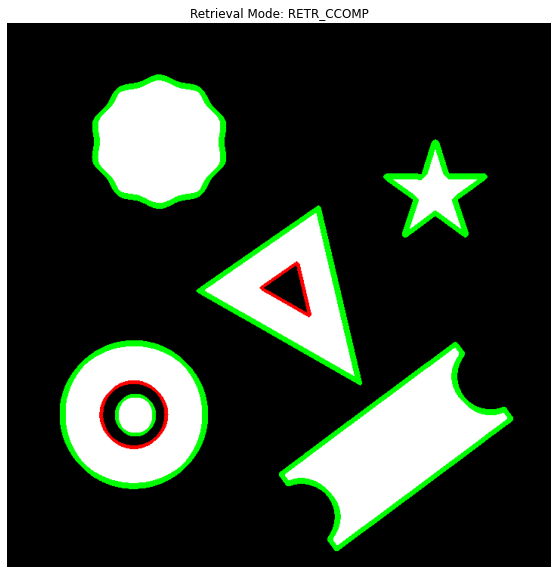

In [ ]:
src_copy = image1.copy()
imageGray = cv2.cvtColor(src_copy,cv2.COLOR_BGR2GRAY)

# Find all contours in the image using RETE_CCOMP method
contours, hierarchy = cv2.findContours(imageGray, cv2.RETR_CCOMP, cv2.CHAIN_APPROX_NONE)

# Loop over all the contours detected
for i,cont in enumerate(contours):

    # If the contour is at first level draw it in green
    if hierarchy[0][i][3] == -1:
        src_copy = cv2.drawContours(src_copy, cont, -1, (0,255,0), 3)

    # else draw the contour in Red
    else:
        src_copy = cv2.drawContours(src_copy, cont, -1, (255,0,0), 3)

# Print the number of Contours returned
print("Number of Contours Returned: {}".format(len(contours)))

# Display the results.
plt.figure(figsize=[10,10])
plt.imshow(src_copy);plt.axis("off");plt.title('Retrieval Mode: RETR_CCOMP');